In [7]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pylab as plt


In [281]:
#For CSV files
inaData = pd.read_csv('ina219-2019-08-23-1566585606.csv').fillna(0)

In [282]:
print(inaData.shape)
inaData.head()

(3957, 3)


,mA,V,time
0,494.7,4.588,1.566586e+09
1,494.7,4.588,1.566586e+09
2,494.4,4.588,1.566586e+09
3,495.3,4.588,1.566586e+09
4,495.0,4.588,1.566586e+09


In [283]:
#add power
type(inaData)

pandas.core.frame.DataFrame

In [284]:
inaData.insert(2, 'watts', (inaData.mA / 1000.0) * inaData.V, True)

In [285]:
inaData.head()

,mA,V,watts,time
0,494.7,4.588,2.269684,1.566586e+09
1,494.7,4.588,2.269684,1.566586e+09
2,494.4,4.588,2.268307,1.566586e+09
3,495.3,4.588,2.272436,1.566586e+09
4,495.0,4.588,2.271060,1.566586e+09


In [286]:
#averages per second

inaLength = inaData.shape[0]
inaStartTime = inaData.time[0]
inaEndTime = inaData.time[inaData.shape[0]-1]
inaTimePeriod = inaEndTime - inaStartTime
dataPerSecond =inaLength/inaTimePeriod

dataPerSecond


15.222949026521858

In [287]:
averagedINA = pd.DataFrame(columns=['mA','V','watts','time'])

for av in list(range(int(inaTimePeriod))):
    avmA= inaData.loc[(15*av):((15*av)+14)]['mA'].sum()/15
    avV = inaData.loc[(15*av):((15*av)+14)]['V'].sum()/15
    avWatts = inaData.loc[(15*av):((15*av)+14)]['watts'].sum()/15
    avTime = inaData.loc[(15*av):(15*av)]['time'][inaData.loc[(15*av):(15*av)]['time'].index[0]]
    averagedINA = averagedINA.append({'mA' : avmA , 'V' : avV, 'watts': avWatts,'time': avTime},ignore_index=True)

    

In [288]:
print averagedINA.shape
averagedINA.head()

(259, 4)


,mA,V,watts,time
0,494.553333,4.588,2.269011,1.566586e+09
1,493.920000,4.588,2.266105,1.566586e+09
2,513.480000,4.588,2.355846,1.566586e+09
3,530.893333,4.588,2.435739,1.566586e+09
4,494.573333,4.588,2.269102,1.566586e+09


In [289]:
seleniumData = pd.read_csv('selenium-2019-08-23-1566585607.csv').fillna(0)


In [290]:
print(seleniumData.shape)
seleniumData.tail()

(147, 2)


,task,time
142,click,1.566586e+09
143,click,1.566586e+09
144,click,1.566586e+09
145,click,1.566586e+09
146,stop static 1,1.566586e+09


In [291]:
startTimeD1 = seleniumData.loc[seleniumData.loc[:,'task']=='start dynamic 0']
stopTimeD1 = seleniumData.loc[seleniumData.loc[:,'task']=='stop dynamic 0']

startTimeS1 = seleniumData.loc[seleniumData.loc[:,'task']=='start static 0']
stopTimeS1 = seleniumData.loc[seleniumData.loc[:,'task']=='stop static 0']

startTimeD2 = seleniumData.loc[seleniumData.loc[:,'task']=='start dynamic 1']
stopTimeD2 = seleniumData.loc[seleniumData.loc[:,'task']=='stop dynamic 1']

startTimeS2 = seleniumData.loc[seleniumData.loc[:,'task']=='start static 1']
stopTimeS2 = seleniumData.loc[seleniumData.loc[:,'task']=='stop static 1']

In [292]:
print startTimeD1
print stopTimeD1
print startTimeS1
print stopTimeS1
print startTimeD2
print stopTimeD2
print startTimeS2
print stopTimeS2

              task          time
0  start dynamic 0  1.566586e+09
              task          time
36  stop dynamic 0  1.566586e+09
              task          time
37  start static 0  1.566586e+09
             task          time
73  stop static 0  1.566586e+09
               task          time
74  start dynamic 1  1.566586e+09
               task          time
110  stop dynamic 1  1.566586e+09
               task          time
111  start static 1  1.566586e+09
              task          time
146  stop static 1  1.566586e+09


In [293]:
#make new data frame with power date from only test duration
inaTestDataD1 = averagedINA.loc[(averagedINA.loc[:,'time']>=startTimeD1.time[0]) & (averagedINA.loc[:,'time']<=stopTimeD1.time[36])]
print(inaTestDataD1.shape)

#make new data frame with power date from only test duration
inaTestDataD2 = averagedINA.loc[(averagedINA.loc[:,'time']>=startTimeD2.time[74]) & (averagedINA.loc[:,'time']<=stopTimeD2.time[110])]
print(inaTestDataD2.shape)

(24, 4)
(24, 4)


In [294]:
#make new data frame with power date from only test duration
inaTestDataS1 = averagedINA.loc[(averagedINA.loc[:,'time']>=startTimeS1.time[37]) & (averagedINA.loc[:,'time']<=stopTimeS1.time[73])]
print(inaTestDataS1.shape)

inaTestDataS2 = averagedINA.loc[(averagedINA.loc[:,'time']>=startTimeS2.time[111]) & (averagedINA.loc[:,'time']<=stopTimeS2.time[146])]
print(inaTestDataS2.shape)

(24, 4)
(23, 4)


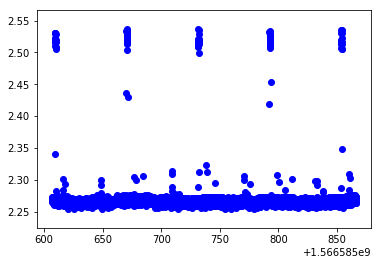

In [295]:

#graph all data
plt.scatter(x=inaData.loc[:,'time'], y=inaData.loc[:,'watts'], color='b')


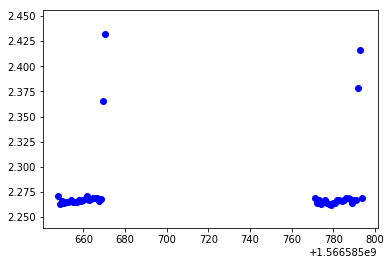

In [296]:
#graph dynamic data
plt.scatter(x=inaTestDataD1.loc[:,'time'], y=inaTestDataD1.loc[:,'watts'], color='b')
plt.scatter(x=inaTestDataD2.loc[:,'time'], y=inaTestDataD2.loc[:,'watts'], color='b')


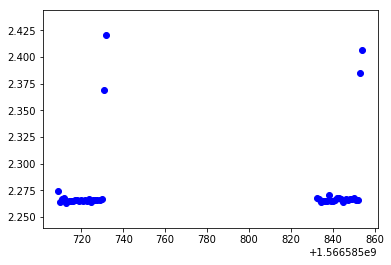

In [297]:
#graph static data
plt.scatter(x=inaTestDataS1.loc[:,'time'], y=inaTestDataS1.loc[:,'watts'], color='b')
plt.scatter(x=inaTestDataS2.loc[:,'time'], y=inaTestDataS2.loc[:,'watts'], color='b')


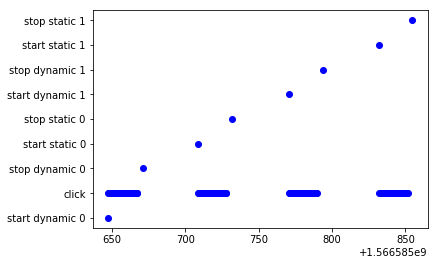

In [298]:

# a graph of volume of project start dates by year
plt.scatter(x=seleniumData.loc[:,'time'], y=seleniumData.loc[:,'task'], color='b')

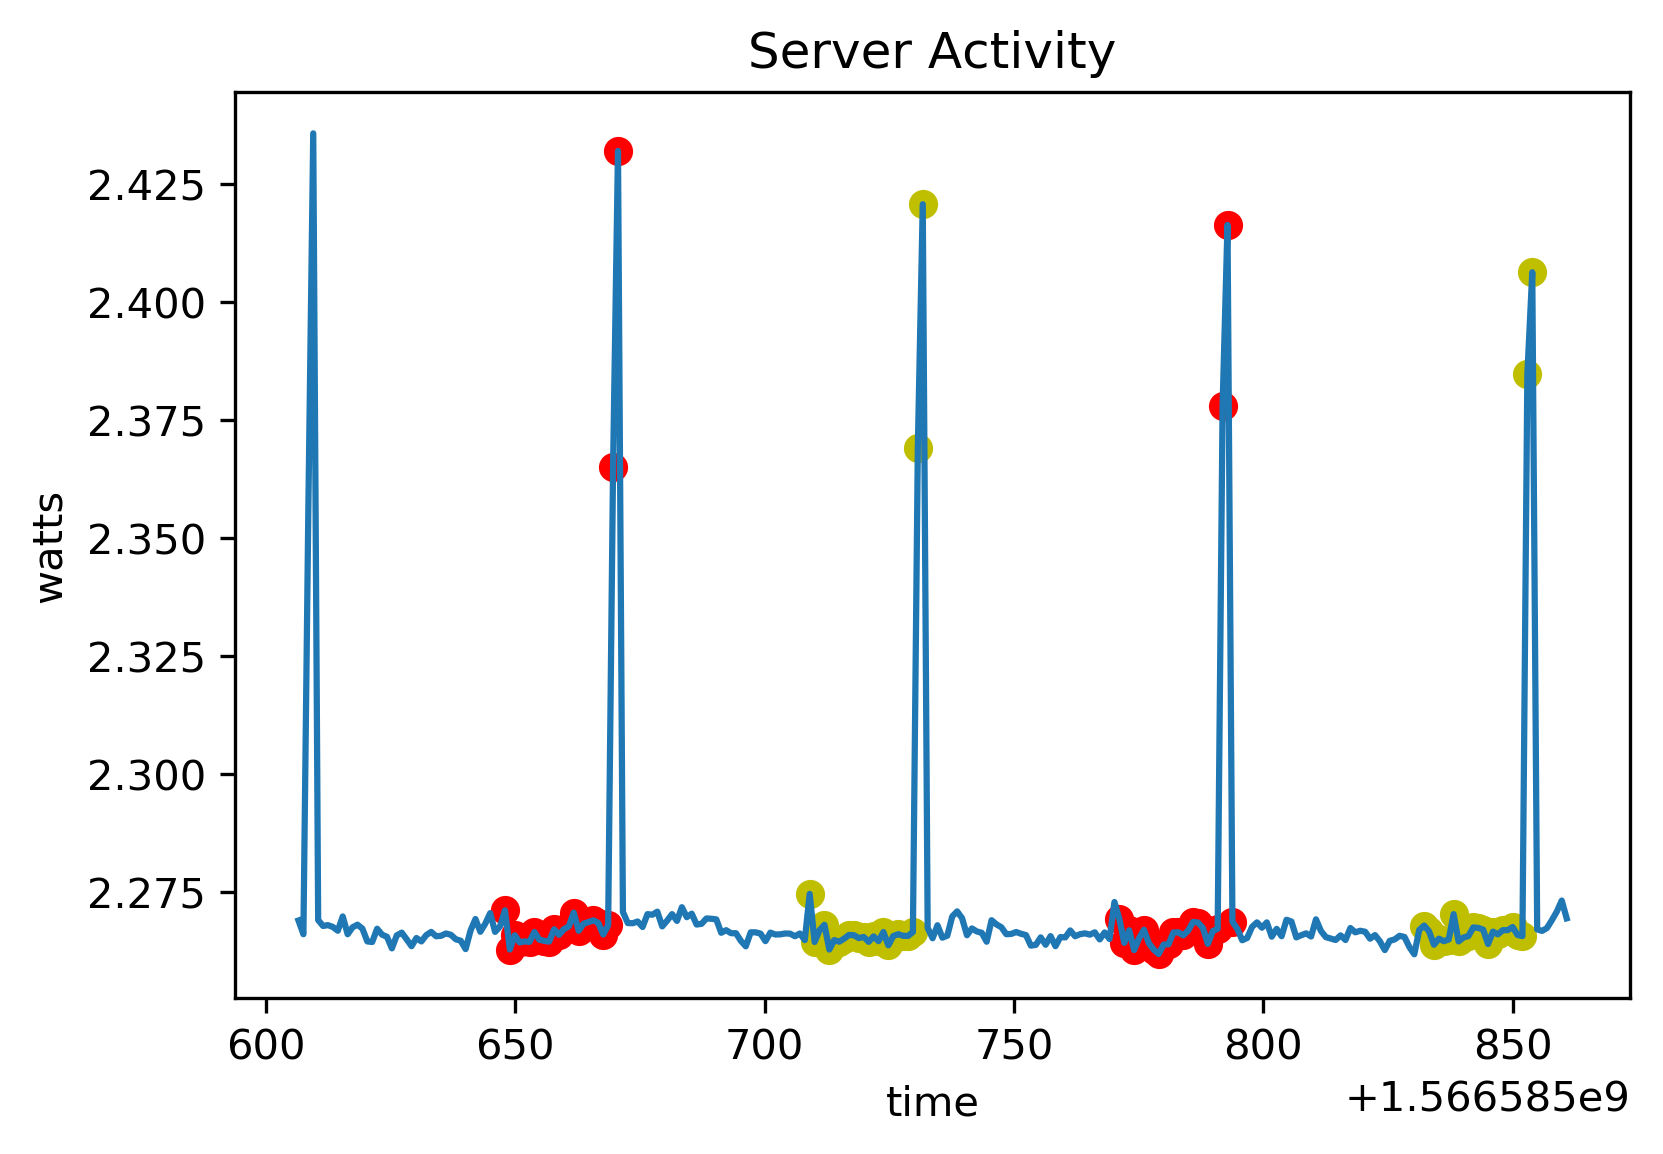

In [323]:
fig, ax = plt.subplots(dpi=300)

x = averagedINA.loc[:,'time']
y = averagedINA.loc[:,'watts']
ax.plot(x,y)

ax.set(xlabel='time', ylabel='watts',
       title='Server Activity')

ax.scatter(x=inaTestDataD1.loc[:,'time'], y=inaTestDataD1.loc[:,'watts'], color='r')
ax.scatter(x=inaTestDataS1.loc[:,'time'], y=inaTestDataS1.loc[:,'watts'], color='y')

ax.scatter(x=inaTestDataD2.loc[:,'time'], y=inaTestDataD2.loc[:,'watts'], color='r')
ax.scatter(x=inaTestDataS2.loc[:,'time'], y=inaTestDataS2.loc[:,'watts'], color='y')

#ax.grid()

fig.savefig("aggregatoroutput_aug23.png")
plt.show()

In [324]:
overlayD1 = inaTestDataD1
#should this be normalized instead?
overlayD1.insert(4, 'scaled', overlayD1.time - overlayD1.time[overlayD1.time.index[0]], True)

overlayD2 = inaTestDataD2
#should this be normalized instead?
overlayD2.insert(4, 'scaled', overlayD2.time - overlayD2.time[overlayD2.time.index[0]], True)

overlayS1 = inaTestDataS1
#should this be normalized instead?
overlayS1.insert(4, 'scaled', overlayS1.time - overlayS1.time[overlayS1.time.index[0]], True)


overlayS2 = inaTestDataS2
#should this be normalized instead?
overlayS2.insert(4, 'scaled', overlayS2.time - overlayS2.time[overlayS2.time.index[0]], True)

In [325]:
overlayD2

,mA,V,watts,time,scaled,scaled
167,494.620000,4.588,2.269317,1.566586e+09,0.000000,0.000000
168,493.520000,4.588,2.264270,1.566586e+09,0.985474,0.985474
169,494.100000,4.588,2.266931,1.566586e+09,1.970702,1.970702
170,493.186667,4.588,2.262740,1.566586e+09,2.956556,2.956556
171,493.726667,4.588,2.265218,1.566586e+09,3.941605,3.941605
172,494.126667,4.588,2.267053,1.566586e+09,4.928040,4.928040
173,493.500000,4.588,2.264178,1.566586e+09,5.913846,5.913846
174,493.206667,4.588,2.262832,1.566586e+09,6.899074,6.899074
175,493.006667,4.588,2.261915,1.566586e+09,7.884557,7.884557
176,493.440000,4.588,2.263903,1.566586e+09,8.870270,8.870270


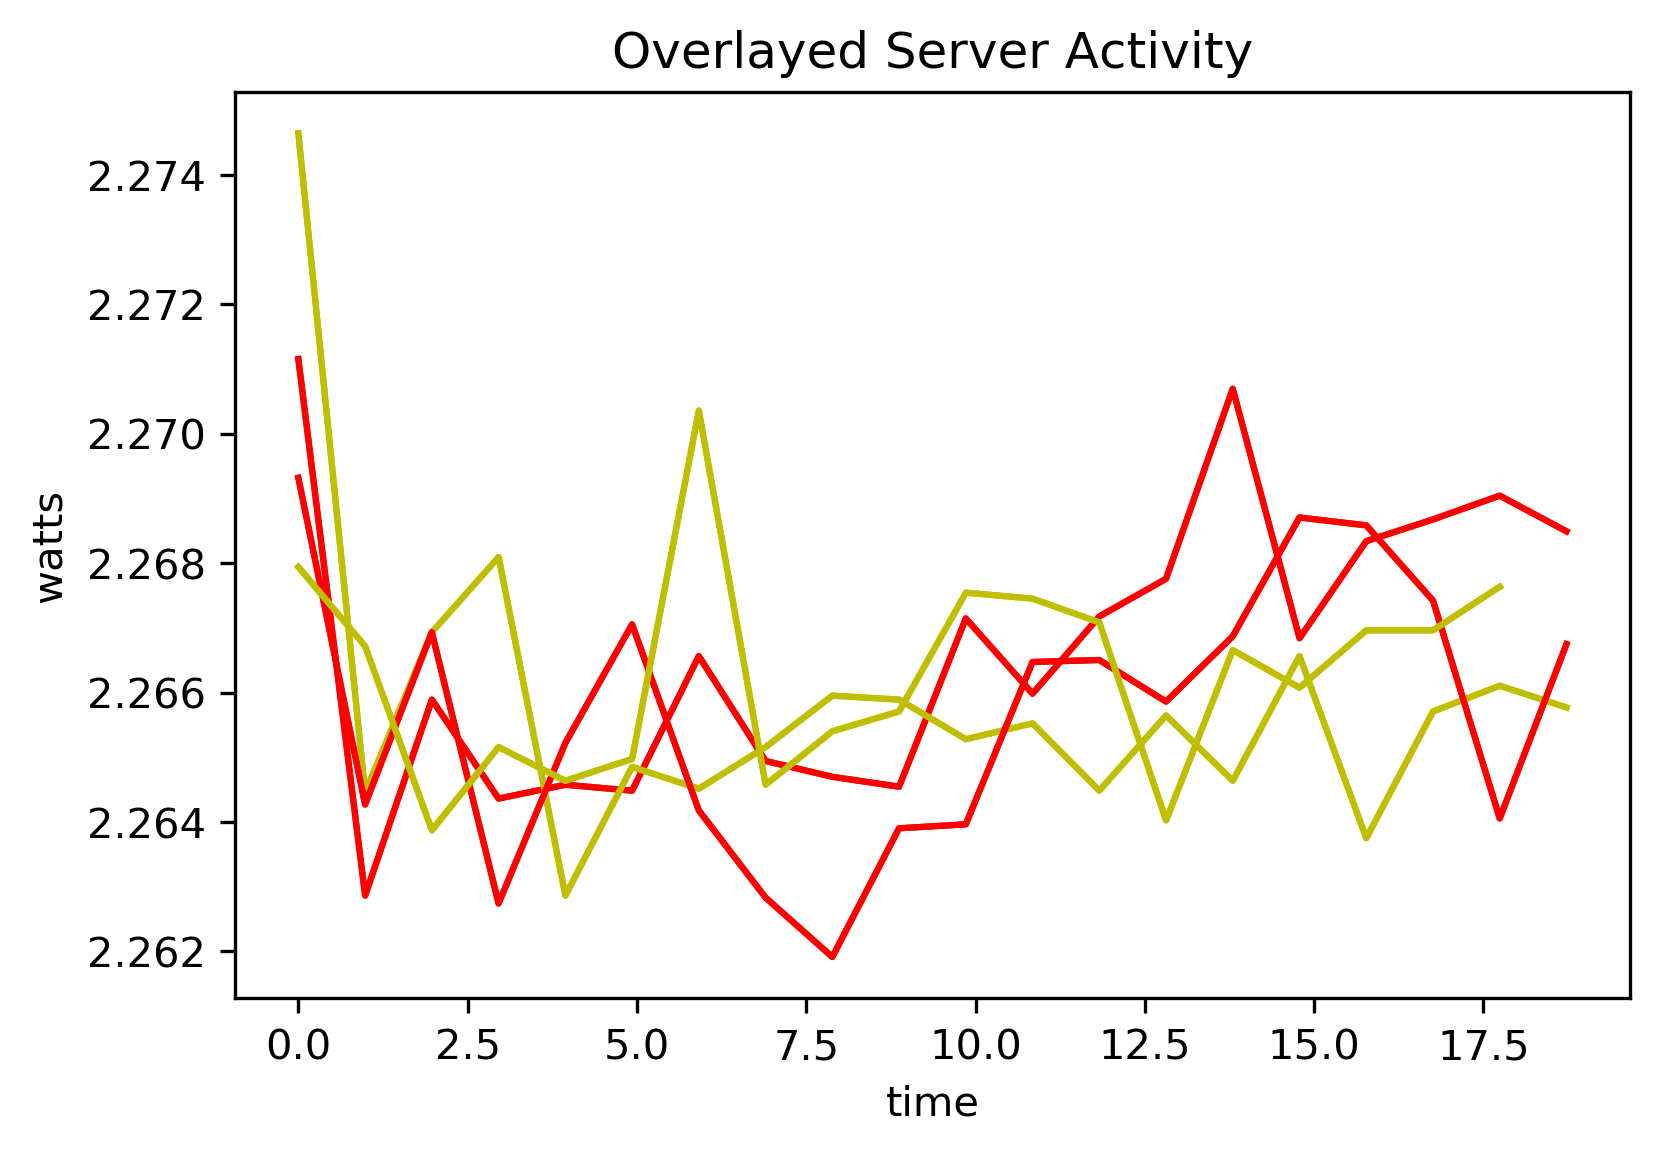

In [326]:
fig, ax = plt.subplots(dpi=300)

x = overlayD1.loc[:overlayD1.index[-5],'scaled']
y = overlayD1.loc[:overlayD1.index[-5],'watts']
ax.plot(x,y, color='r')

ax.set(xlabel='time', ylabel='watts',
       title='Overlayed Server Activity')

#ax.scatter(x=overlayD1.loc[:,'scaled'], y=overlayD1.loc[:,'watts'], color='r')
ax.plot(overlayS1.loc[:overlayS1.index[-5],'scaled'], overlayS1.loc[:overlayS1.index[-5],'watts'], color='y')

ax.plot(overlayD2.loc[:overlayD2.index[-5],'scaled'], overlayD2.loc[:overlayD2.index[-5],'watts'], color='r')
ax.plot(overlayS2.loc[:overlayS2.index[-5],'scaled'], overlayS2.loc[:overlayS2.index[-5],'watts'], color='y')

#ax.grid()

fig.savefig("aggregatoroutput_overlay_aug23.png")
plt.show()